## CMPINF 2110 Spring 2021 - Homework 02

### SOLUTION GUIDE

Dr. Joseph P. Yurko

## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Problem 01

The `tidy_data_table_9_use.csv` file was downloaded from Canvas and saved to the local directory as this notebook. The CSV file is read into a Pandas DataFrame below.

In [2]:
tb = pd.read_csv( 'tidy_data_table_9_use.csv' )

The `.info()` method reveals that most of the columns contain a large number of missings. We also see that there are 18 columns (0 through 17 since Python is zero-based). We know from the Tidy Data paper that the column names for column index 2 through 17 are storing two pieces of information, the gender and the age group. The 0th column and 1st column store the `country` abbreviation and the `year`. 

In [3]:
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  5746 non-null   object 
 1   year     5769 non-null   int64  
 2   f_014    2378 non-null   float64
 3   f_1524   2394 non-null   float64
 4   f_2534   2400 non-null   float64
 5   f_3544   2398 non-null   float64
 6   f_4554   2401 non-null   float64
 7   f_5564   2394 non-null   float64
 8   f_65     2396 non-null   float64
 9   f_u      272 non-null    float64
 10  m_014    2381 non-null   float64
 11  m_1524   2407 non-null   float64
 12  m_2534   2408 non-null   float64
 13  m_3544   2415 non-null   float64
 14  m_4554   2421 non-null   float64
 15  m_5564   2414 non-null   float64
 16  m_65     2408 non-null   float64
 17  m_u      273 non-null    float64
dtypes: float64(16), int64(1), object(1)
memory usage: 811.4+ KB


We know how the data are structured from the Tidy Data paper, but let's confirm the layout taking a look at a few rows in the data set. The first rows show the `country == 'AD'` as the `year` increments by one from 1989 to 1993. It therefore appears that the data store a series of observations within each column, and each row is a set of observations per year in a country. The first few rows also demonstrate that we are working with a data set with a fair amount of missing values.

In [4]:
tb.head()

,country,year,f_014,f_1524,f_2534,f_3544,f_4554,f_5564,f_65,f_u,m_014,m_1524,m_2534,m_3544,m_4554,m_5564,m_65,m_u
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The `.tail()` method shows the last few rows in the data set. We can see that there are non-missing entries for the columns, but the `country` value is missing! This means we do not know which country the values in the other columns are associated with!

In [5]:
tb.tail()

,country,year,f_014,f_1524,f_2534,f_3544,f_4554,f_5564,f_65,f_u,m_014,m_1524,m_2534,m_3544,m_4554,m_5564,m_65,m_u
5764,NaN,2004,30.0,400.0,819.0,554.0,203.0,106.0,74.0,NaN,31.0,319.0,1092.0,866.0,371.0,159.0,131.0,NaN
5765,NaN,2005,105.0,399.0,809.0,525.0,213.0,95.0,91.0,NaN,98.0,355.0,1027.0,874.0,365.0,146.0,120.0,NaN
5766,NaN,2006,74.0,485.0,875.0,521.0,239.0,92.0,80.0,NaN,86.0,347.0,1052.0,799.0,386.0,174.0,146.0,NaN
5767,NaN,2007,69.0,417.0,826.0,513.0,242.0,102.0,76.0,NaN,57.0,370.0,1018.0,786.0,346.0,149.0,120.0,NaN
5768,NaN,2008,73.0,466.0,702.0,437.0,226.0,110.0,80.0,0.0,30.0,387.0,1033.0,757.0,346.0,149.0,132.0,0.0


Let's double check the number of missing values per column. We can see below that only `year` is present for every row. There are in fact a total of 23 rows with missing values for `country`. The `f_u` and `m_u` columns have the most number of missing values of the remaining columns. The `_u` corresponds to an unknown age group and so if either the `f_u` or `m_u` columns are not missing, the cases could not be associated with one of the listed age groups.

In [6]:
tb.isna().sum()

country      23
year          0
f_014      3391
f_1524     3375
f_2534     3369
f_3544     3371
f_4554     3368
f_5564     3375
f_65       3373
f_u        5497
m_014      3388
m_1524     3362
m_2534     3361
m_3544     3354
m_4554     3348
m_5564     3355
m_65       3361
m_u        5496
dtype: int64

Let's next check the number of unique values for each column. As we can see below, there are 212 unique values for `country` and 29 unique values for `year`.

In [7]:
tb.nunique()

country     212
year         29
f_014       386
f_1524      848
f_2534      904
f_3544      769
f_4554      650
f_5564      559
f_65        554
f_u           9
m_014       351
m_1524      907
m_2534     1053
m_3544      997
m_4554      877
m_5564      749
m_65        706
m_u          12
dtype: int64

If we are correct that each row corresponds to a year and country, then there should be 1 row for each unique combination of `country` and `year`.

In [8]:
tb.groupby(['country', 'year']).size().reset_index(name='num_rows')

,country,year,num_rows
0,AD,1989,1
1,AD,1990,1
2,AD,1991,1
3,AD,1992,1
4,AD,1993,1
...,...,...,...
5741,ZW,2004,1
5742,ZW,2005,1
5743,ZW,2006,1
5744,ZW,2007,1


We can then confirm if each combination has exactly 1 row by applying the `.value_counts()` method to the created `num_rows` column. As we can see below, yes there is indeed one row per combination of `country` and `year`.

In [9]:
tb.groupby(['country', 'year']).size().reset_index(name='num_rows').num_rows.value_counts()

1    5746
Name: num_rows, dtype: int64

How many rows are associated with each `year` value?

In [10]:
tb.groupby(['year']).size().reset_index(name='num_rows')

,year,num_rows
0,1980,191
1,1981,194
2,1982,194
3,1983,196
4,1984,193
5,1985,198
6,1986,197
7,1987,199
8,1988,201
9,1989,197


Skimming through the number of rows per `year`, we see that only the last few years have the number of rows associated with all countries (including the missing). We can visualize this too, though you were not required to do so.

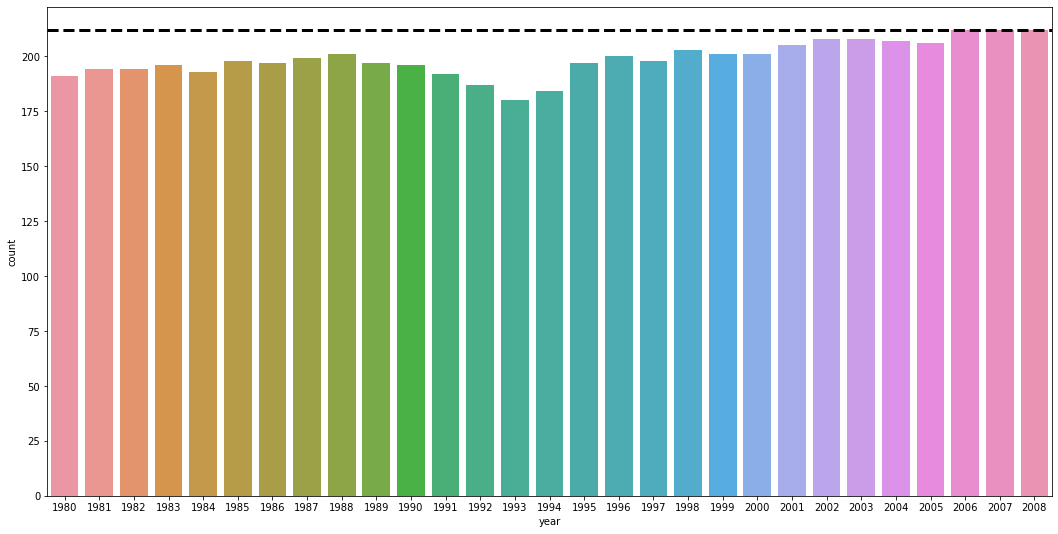

In [11]:
fig, ax = plt.subplots(figsize=(18, 9))

sns.countplot(data = tb, x='year', ax=ax)

ax.axhline(y=tb.country.nunique(), color='black', linestyle='--', linewidth=3)

plt.show()

We will now begin to "tidy" the data set by reshaping from the current format into a long, tall, or *molten* format with the `.melt()` method. However, before doing so, let's extract the column names except for `country` and `year`.

In [12]:
feature_names = tb.drop(columns=['country', 'year']).columns.to_list()

As we see below, the `feature_names` list stores the names of the columns except for `country` and `year`.

In [13]:
print( feature_names )

['f_014', 'f_1524', 'f_2534', 'f_3544', 'f_4554', 'f_5564', 'f_65', 'f_u', 'm_014', 'm_1524', 'm_2534', 'm_3544', 'm_4554', 'm_5564', 'm_65', 'm_u']


Although we used the `.drop()` method to help create the `feature_names` list, we kept the `inplace=False` default. Thus, the `tb` data set was not modified in place and still has all of the column names.

In [14]:
tb.columns

Index(['country', 'year', 'f_014', 'f_1524', 'f_2534', 'f_3544', 'f_4554',
       'f_5564', 'f_65', 'f_u', 'm_014', 'm_1524', 'm_2534', 'm_3544',
       'm_4554', 'm_5564', 'm_65', 'm_u'],
      dtype='object')

Let's now melt the data set into a long format DataFrame by setting the `id_vars` to `year` and `country`. The `value_vars` are the remaining columns, which we specify to be the "featur" variables in the `feature_names` list.

In [15]:
lf = tb.melt(id_vars=['year', 'country'], value_vars=feature_names)

In [16]:
lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92304 entries, 0 to 92303
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      92304 non-null  int64  
 1   country   91936 non-null  object 
 2   variable  92304 non-null  object 
 3   value     34160 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.8+ MB


As we see above, the `lf` DataFrame has just 4 columns and 92304 rows. Why are there so many rows? Because we stacked all other columns on top of each other. Thus, we should have as many rows in `lf` as the original number of rows multiplied by the length of `feature_names`.

In [17]:
tb.shape[0] * len( feature_names )

92304

Which can be confirmed to be the same as the rows in `lf` as:

In [18]:
tb.shape[0] * len(feature_names) == lf.shape[0]

True

The `variable` column in `lf` contains the column names contained in `feature_names`. As a check the number of unique values of `lf.variable` should equal the length of `feature_names`.

In [19]:
lf.variable.nunique() == len( feature_names )

True

The number of rows associated with each unique value of `lf.variable` should equal the number of rows in the original dataset, `tb`. We can see below that each value of `lf.variable` has the same number of rows.

In [20]:
lf.variable.value_counts()

f_u       5769
f_014     5769
m_65      5769
m_2534    5769
f_1524    5769
f_5564    5769
m_u       5769
m_4554    5769
m_1524    5769
f_3544    5769
m_5564    5769
f_4554    5769
m_014     5769
f_2534    5769
f_65      5769
m_3544    5769
Name: variable, dtype: int64

And that number is the same as the number of rows in the original dataset.

In [21]:
tb.shape[0]

5769

The `variable` column now contains two different pieces of information, the gender and the age group. Let's split the string on the underscore, `'_'`, to break up the variable into the two distinct pieces of information.

In [22]:
lf[['gender', 'age_group_word']] = lf.variable.str.split( '_', expand=True )

In [23]:
lf

,year,country,variable,value,gender,age_group_word
0,1989,AD,f_014,NaN,f,014
1,1990,AD,f_014,NaN,f,014
2,1991,AD,f_014,NaN,f,014
3,1992,AD,f_014,NaN,f,014
4,1993,AD,f_014,NaN,f,014
...,...,...,...,...,...,...
92299,2004,NaN,m_u,NaN,m,u
92300,2005,NaN,m_u,NaN,m,u
92301,2006,NaN,m_u,NaN,m,u
92302,2007,NaN,m_u,NaN,m,u


Let's take a look at the unique values for the age groups.

In [24]:
age_info = lf.groupby(['age_group_word']).size().reset_index(name='num_rows')

In [25]:
age_info

,age_group_word,num_rows
0,014,11538
1,1524,11538
2,2534,11538
3,3544,11538
4,4554,11538
5,5564,11538
6,65,11538
7,u,11538


As we see above, each age group has the same number of rows in the long format data set. However, we do not need the `num_rows` column and so it can be dropped.

In [26]:
age_info.drop(columns=['num_rows'], inplace=True)

Let's now change or alter the age groups to have more readable names. There are a few ways to do this, but a simple approach is to manually type in the names and then merge or join the more readable names to the long format data set. The age group names from the Tidy Data paper include `'-'` in most of their names. The rules for how to place the dash are not the same across all age groups. And the 65 and older group has a different format with the "+" compared to the other groups. Since there are just 8 age groups, it is straightforward to define the readable names manually.

In [27]:
age_info['age_group'] = ['0-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65+', 'unknown']

In [28]:
age_info

,age_group_word,age_group
0,014,0-14
1,1524,15-24
2,2534,25-34
3,3544,35-44
4,4554,45-54
5,5564,55-64
6,65,65+
7,u,unknown


We can then merge in the more readable names with a LEFT JOIN via the `pd.merge()` function. Notice that the join between the `lf` and `age_info` DataFrames is specified to occur *on* the `age_group_word` variable. The `age_group_word` variable therefore serves as a **key** to link the two tables together.

In [29]:
lf = pd.merge( lf, age_info, on='age_group_word', how='left')

In [30]:
lf

,year,country,variable,value,gender,age_group_word,age_group
0,1989,AD,f_014,NaN,f,014,0-14
1,1990,AD,f_014,NaN,f,014,0-14
2,1991,AD,f_014,NaN,f,014,0-14
3,1992,AD,f_014,NaN,f,014,0-14
4,1993,AD,f_014,NaN,f,014,0-14
...,...,...,...,...,...,...,...
92299,2004,NaN,m_u,NaN,m,u,unknown
92300,2005,NaN,m_u,NaN,m,u,unknown
92301,2006,NaN,m_u,NaN,m,u,unknown
92302,2007,NaN,m_u,NaN,m,u,unknown


The final tidy data set is created by removing the redundant columns. The cell below selects specific columns from `lf` and defines a new object, `tidy_tb`, rather than dropping the columns with the `.drop()` method.

In [31]:
tidy_tb = lf.loc[:, ['country', 'year', 'gender', 'age_group', 'value']].copy()

In [32]:
tidy_tb

,country,year,gender,age_group,value
0,AD,1989,f,0-14,NaN
1,AD,1990,f,0-14,NaN
2,AD,1991,f,0-14,NaN
3,AD,1992,f,0-14,NaN
4,AD,1993,f,0-14,NaN
...,...,...,...,...,...
92299,NaN,2004,m,unknown,NaN
92300,NaN,2005,m,unknown,NaN
92301,NaN,2006,m,unknown,NaN
92302,NaN,2007,m,unknown,NaN


The column names in `tidy_tb` are different from those in the Tidy Data paper. That's fine, but we just rename them if we would like.

In [33]:
tidy_tb.rename(columns={'gender': 'sex', 'age_group': 'age', 'value': 'cases'}, inplace=True)

In [34]:
tidy_tb

,country,year,sex,age,cases
0,AD,1989,f,0-14,NaN
1,AD,1990,f,0-14,NaN
2,AD,1991,f,0-14,NaN
3,AD,1992,f,0-14,NaN
4,AD,1993,f,0-14,NaN
...,...,...,...,...,...
92299,NaN,2004,m,unknown,NaN
92300,NaN,2005,m,unknown,NaN
92301,NaN,2006,m,unknown,NaN
92302,NaN,2007,m,unknown,NaN


We now have the same tidy data set from the paper! Notice that one row corresponds to the number of cases within an age group, of a gender, in a year, within a country. As the paper mentions, this format allows joining the population per age group and gender in a year within a country. This enables calculating fractions or rates of the population within a group, rather than just working with the raw counts. We do not have the population per country per year for this problem, but if we did joining that information to our tidy data set would be straight forward to do.

We can now answer the questions associated with Problem 01.

**Question: How many rows and columns are in the final tidy data set?**

In [35]:
tidy_tb.shape

(92304, 5)

**How many unique country values are there?**

In [36]:
tidy_tb.country.nunique()

212

As we can see above we have 212 unique values for `country`. This is consistent with the number of unique values in the original data set.

**How many unique years are there?**

In [37]:
tidy_tb.year.nunique()

29

We have 29 unique years, just as we had in the original data set.

**How many rows are associated with each year?**

As shown below, there are **more** rows per year compared to the original data set. This makes sense since each year is associated with 16 rows per country. Each row per year and country combination corresponds to a combination of gender and age group.

In [38]:
tidy_tb.groupby(['year']).size().reset_index(name='num_rows')

,year,num_rows
0,1980,3056
1,1981,3104
2,1982,3104
3,1983,3136
4,1984,3088
5,1985,3168
6,1986,3152
7,1987,3184
8,1988,3216
9,1989,3152


## Problem 02

We will use the our tidy long-format data set, `tidy_tb`, to answre the questions in Problem 02.

**Question: Which year has the most missing values? Which year has the fewest missing values?**

In Problem 01, the `.isna().sum()` methods were used to calculate the number of missing values per column. We cannot use that strategy here because we are interested in counting the number of missing values per group. Let's first try grouping by `year` and then apply the Pandas count method tot he `cases` column. Thus, we are counting the number of **non missing** entries of `cases`  the number of rows associated with `cases`.

In [39]:
tidy_tb.groupby(['year']).\
aggregate(cases_nonmissing = ('cases', 'count')).\
reset_index()

,year,cases_nonmissing
0,1980,28
1,1981,28
2,1982,28
3,1983,28
4,1984,28
5,1985,28
6,1986,28
7,1987,28
8,1988,14
9,1989,28


Let's repeat the above operation, but this time also apply the Pandas size method to the `cases` column for each `year` group. The `size()` method gives us the number of observations (rows). Thus, the `size()` method does **not** distinguish between missing and non-missing values!

In [40]:
tidy_tb.groupby(['year']).\
aggregate(cases_nonmissing = ('cases', 'count'),
          cases_size = ('cases', 'size')).\
reset_index()

,year,cases_nonmissing,cases_size
0,1980,28,3056
1,1981,28,3104
2,1982,28,3104
3,1983,28,3136
4,1984,28,3088
5,1985,28,3168
6,1986,28,3152
7,1987,28,3184
8,1988,14,3216
9,1989,28,3152


The `count()` method gives us the number of non-missings, and the `size()` method gives us the total number of rows. Thus, the number of missing values is the difference between the two. Below, the grouped year data set is assigned to the `tb_year_info` object, and then the `cases_missings` column is added to the DataFrame.

In [41]:
tb_year_info = tidy_tb.groupby(['year']).\
aggregate(cases_nonmissing = ('cases', 'count'),
          cases_size = ('cases', 'size')).\
reset_index()

In [42]:
tb_year_info['cases_missings'] = tb_year_info.cases_size - tb_year_info.cases_nonmissing

It's now straightforward to find the year with the most missing values, we can just sort the `tb_year_info` DataFrame based on the `cases_missings` column. The `ascending` argument is set to `False` in the `.sort_values()` method and the head of the sorted DataFrame is printed to the screen. As we can see below, the year with the most missings is 1988.

In [43]:
tb_year_info.sort_values(['cases_missings'], ascending=False).head()

,year,cases_nonmissing,cases_size,cases_missings
8,1988,14,3216,3202
7,1987,28,3184,3156
5,1985,28,3168,3140
6,1986,28,3152,3124
9,1989,28,3152,3124


Likewise we can easily find the year with the fewest missings by sorting with the `ascending` argument set to `True`. As we can see below, the year 2008 has the fewest missings.

In [44]:
tb_year_info.sort_values(['cases_missings'], ascending=True).head()

,year,cases_nonmissing,cases_size,cases_missings
28,2008,2907,3392,485
26,2006,2752,3392,640
25,2005,2638,3296,658
24,2004,2646,3312,666
23,2003,2661,3328,667


Alternatively, we can extract the year associated with the most missings by using a conditional subset (select rows based on a condition). The year associated with the most missings is displayed below.

In [45]:
tb_year_info.loc[ tb_year_info.cases_missings == tb_year_info.cases_missings.max(), :]

,year,cases_nonmissing,cases_size,cases_missings
8,1988,14,3216,3202


Likewise the year associated with the fewest misisngs is given below.

In [46]:
tb_year_info.loc[ tb_year_info.cases_missings == tb_year_info.cases_missings.min(), :]

,year,cases_nonmissing,cases_size,cases_missings
28,2008,2907,3392,485


We can double check our grouping and aggregation steps are correct by isolating the two years identified with the most and fewest missings. The cell below selects all rows in the `tidy_tb` data set associated with the year 1988 and assigns the result to the `tidy_1988` object.

In [47]:
tidy_1988 = tidy_tb.loc[ tidy_tb.year == 1988, : ].copy()

Let's now use the `.isna().sum()` methods to count the number of missing values for each column in `tidy_1988`. As shown in the display below, there are 3202 rows with missing values for `cases`, just as we saw previously.

In [48]:
tidy_1988.isna().sum()

country      16
year          0
sex           0
age           0
cases      3202
dtype: int64

Likewise, the cell below selects all rows associated with 2008 and assigns the result to the `tidy_2008` object.

In [49]:
tidy_2008 = tidy_tb.loc[ tidy_tb.year == 2008, : ].copy()

The number of missing values per column reveals the same number of missings as we calculated previously.

In [50]:
tidy_2008.isna().sum()

country     16
year         0
sex          0
age          0
cases      485
dtype: int64

Thus, the `.groupby()` method takes care of "splitting" a data set into the separate groups. The `.aggregate()` method handles *applying* functions to those groups, and then *combining* the results into a single DataFrame.

**Question: Which year has the most total cases (across all age groups) for males in the countries with codes AO and AR?**

We can handle this question several ways. The specific approach we will show in the solutions is to first group by `year`, `country`, **and** `sex`. For each group (which is defined by the combination of *three* columns) the `cases` are aggregated by calculating the sum of the cases across all age groups. Although this sounds like a lot of steps, it simply requires the `sum()` function to be applied to `cases` in the `.aggregate()` call. The result is assigned to the `county_year_gender` DataFrame. The number of non-missing and total number of rows per combination are also included as reference.

In [51]:
country_year_gender = tidy_tb.groupby(['year', 'country', 'sex']).\
aggregate(total_cases = ('cases', 'sum'),
          cases_nonmissing = ('cases', 'count'),
          cases_size = ('cases', 'size')).\
reset_index()

The `.info()` method is displayed below for our grouped data set.

In [52]:
country_year_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11492 entries, 0 to 11491
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              11492 non-null  int64  
 1   country           11492 non-null  object 
 2   sex               11492 non-null  object 
 3   total_cases       11492 non-null  float64
 4   cases_nonmissing  11492 non-null  int64  
 5   cases_size        11492 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 538.8+ KB


The `.head()` and `.tail()` methods are shown below to give a quick glimpse of the grouped data set.

In [53]:
country_year_gender.head()

,year,country,sex,total_cases,cases_nonmissing,cases_size
0,1980,AE,f,0.0,0,8
1,1980,AE,m,0.0,0,8
2,1980,AF,f,0.0,0,8
3,1980,AF,m,0.0,0,8
4,1980,AG,f,0.0,0,8


In [54]:
country_year_gender.tail()

,year,country,sex,total_cases,cases_nonmissing,cases_size
11487,2008,ZA,m,74579.0,8,8
11488,2008,ZM,f,5387.0,8,8
11489,2008,ZM,m,7824.0,8,8
11490,2008,ZW,f,4621.0,8,8
11491,2008,ZW,m,5209.0,8,8


This question is focused on the total cases for males, and so let's select all rows in the `country_year_gender` data set associated with `sex == 'm'`. The result is assigned to the `country_year_males` object.

In [55]:
country_year_males = country_year_gender.loc[ country_year_gender.sex == 'm', :].copy()

We can now select all rows associated with the `country == 'AO'` and sort based on the `total_cases`.

In [56]:
country_year_males.loc[ country_year_males.country == 'AO', :].copy().\
sort_values(['total_cases'], ascending=False)

,year,country,sex,total_cases,cases_nonmissing,cases_size
11087,2008,AO,m,11881.0,8,8
10665,2007,AO,m,11281.0,7,8
10243,2006,AO,m,10957.0,7,8
9831,2005,AO,m,10165.0,7,8
9421,2004,AO,m,9973.0,7,8
9007,2003,AO,m,9233.0,7,8
8593,2002,AO,m,9120.0,7,8
7383,1999,AO,m,4801.0,7,8
6185,1996,AO,m,4259.0,7,8
6585,1997,AO,m,4181.0,7,8


**As the above display shows, the maximum `total_cases` for males in `country=='AO'` is 2008.**  

If this does not seem "programmatic" enough, an alternative approach is to use the Pandas Series method `.idxmax()` which returns the index associated with the maximum value of a Series. You were not required to use this method for the assignment, but it can be a useful method in some circumstances.

In [57]:
country_year_males.loc[ country_year_males.country == 'AO', :].copy().total_cases.idxmax()

11087

The value displayed above is the index associated with the maximum `total_cases` value for `country == 'AO'` in `country_year_males`. Notice that value is the *same* as the index for the first displayed row in the sorted data set. The cell below shows the `.head()` of the sorted data set to make it clear the two values are the same.

In [58]:
country_year_males.loc[ country_year_males.country == 'AO', :].copy().\
sort_values(['total_cases'], ascending=False).\
head()

,year,country,sex,total_cases,cases_nonmissing,cases_size
11087,2008,AO,m,11881.0,8,8
10665,2007,AO,m,11281.0,7,8
10243,2006,AO,m,10957.0,7,8
9831,2005,AO,m,10165.0,7,8
9421,2004,AO,m,9973.0,7,8


If we assign the index associated with the max total cases to a variable, we can programmatically access that row, as shown below.

In [59]:
row_max_ao = country_year_males.loc[ country_year_males.country == 'AO', :].copy().total_cases.idxmax()

In [60]:
country_year_males.loc[ row_max_ao ]

year                   2008
country                  AO
sex                       m
total_cases         11881.0
cases_nonmissing          8
cases_size                8
Name: 11087, dtype: object

The year with the most total cases for males in `country == 'AR'` found similarly.

In [61]:
country_year_males.loc[ country_year_males.country == 'AR', :].copy().\
sort_values(['total_cases'], ascending=False).\
head()

,year,country,sex,total_cases,cases_nonmissing,cases_size
8187,2001,AR,m,3177.0,7,8
6587,1997,AR,m,3098.0,7,8
8595,2002,AR,m,3068.0,7,8
6981,1998,AR,m,2929.0,7,8
10667,2007,AR,m,2885.0,7,8


As we see above, **the most total cases for males in `country == 'AR'` occcurred in 2001.**

**Question: Which year has the most total cases (across all age groups) for females in the countries with codes AF and AM?**

This question is answered following the same steps as the last question. We start with the `country_year_gender` data set, and select all rows with `sex == 'f'`. The result is assigned to the `country_year_females` object.

In [62]:
country_year_females = country_year_gender.loc[ country_year_gender.sex == 'f', :].copy()

**The year with the most total cases for `country == 'AF'` is shown below to be 2007.**

In [63]:
country_year_females.loc[ country_year_females.country == 'AF', :].copy().\
sort_values(['total_cases'], ascending=False).\
head()

,year,country,sex,total_cases,cases_nonmissing,cases_size
10652,2007,AF,f,9031.0,7,8
11074,2008,AF,f,8915.0,7,8
10230,2006,AF,f,8520.0,7,8
9820,2005,AF,f,6818.0,7,8
9408,2004,AF,f,5587.0,7,8


**The year with the most total cases for `country == 'AM'` is shown below to be 2008.**

In [64]:
country_year_females.loc[ country_year_females.country == 'AM', :].copy().\
sort_values(['total_cases'], ascending=False).\
head()

,year,country,sex,total_cases,cases_nonmissing,cases_size
11082,2008,AM,f,118.0,8,8
8180,2001,AM,f,116.0,7,8
8588,2002,AM,f,115.0,7,8
10238,2006,AM,f,102.0,8,8
9002,2003,AM,f,99.0,7,8


Again, if we wanted to be more programmatic, we could use the `.idxmax()` method and assign the result to a variable. You were not required to do this for the assignment, but the cell below shows how to identify the row associated with the max `total_cases` for females in `country == 'AM'`.

In [65]:
row_max_am = country_year_females.loc[ country_year_females.country == 'AO', :].copy().total_cases.idxmax()

In [66]:
country_year_females.loc[ row_max_am ]

year                   2008
country                  AO
sex                       f
total_cases         10681.0
cases_nonmissing          8
cases_size                8
Name: 11086, dtype: object

## Problem 03

Let's start by reading in the open prices CSV file, and checking it's `.info()` method.

In [67]:
df_open = pd.read_csv("daily_open_prices.csv")

In [68]:
df_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       100 non-null    object 
 1   AAPL_open  100 non-null    float64
 2   AMZN_open  100 non-null    float64
 3   GME_open   100 non-null    float64
 4   KO_open    100 non-null    float64
 5   TSLA_open  100 non-null    float64
 6   VZ_open    100 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


As we can see above, there are 7 columns. The `date` column followed by one column for each of the 6 companies.

Next, let's read in the closing price CSV file and check it's `.info()` method.

In [69]:
df_close = pd.read_csv('daily_close_prices.csv')

df_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        100 non-null    object 
 1   AAPL_close  100 non-null    float64
 2   AMZN_close  100 non-null    float64
 3   GME_close   100 non-null    float64
 4   KO_close    100 non-null    float64
 5   TSLA_close  100 non-null    float64
 6   VZ_close    100 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


We see the same structure as `df_open`, except that the column names are different. The low prices CSV file is read in next.

In [70]:
df_low = pd.read_csv('daily_low_prices.csv')

df_low.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      100 non-null    object 
 1   AAPL_low  100 non-null    float64
 2   AMZN_low  100 non-null    float64
 3   GME_low   100 non-null    float64
 4   KO_low    100 non-null    float64
 5   TSLA_low  100 non-null    float64
 6   VZ_low    100 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


And finally the high prices CSV file.

In [71]:
df_high = pd.read_csv('daily_high_prices.csv')

df_high.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       100 non-null    object 
 1   AAPL_high  100 non-null    float64
 2   AMZN_high  100 non-null    float64
 3   GME_high   100 non-null    float64
 4   KO_high    100 non-null    float64
 5   TSLA_high  100 non-null    float64
 6   VZ_high    100 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


Let's first confirm that each row in the 4 data sets corresponds to a unique day. As we can see below, each unique value of `date` has 1 row in the data set.

In [72]:
print( df_open.groupby(['date']).size().reset_index(name='num_rows').num_rows.value_counts() )

print( df_close.groupby(['date']).size().reset_index(name='num_rows').num_rows.value_counts() )

print( df_low.groupby(['date']).size().reset_index(name='num_rows').num_rows.value_counts() )

print( df_high.groupby(['date']).size().reset_index(name='num_rows').num_rows.value_counts() )

1    100
Name: num_rows, dtype: int64
1    100
Name: num_rows, dtype: int64
1    100
Name: num_rows, dtype: int64
1    100
Name: num_rows, dtype: int64


All 4 data sets consist of the same number of rows and columns. The column names are different to reflect the type of price information that is being recorded for each company. The columns therefore contain two different pieces of information and so none of the 4 data sets are "tidy". The 6 columns after `date` give the company stock symbol then the price type, separated by an underscore. 

We will combine all 4 data sets together, but first we will reshape each data set into long-format. This way all 4 data sets will have the same column names, and we can easily concatenate the DataFrames by binding the rows together.  

Let's start by reshaping or *melting* the open prices data set. The `id_vars` is set to `'date'`. The `value_vars` is set to the names of the remaining 6 columns in the DataFrame with `_open` appended to each.

In [73]:
lf_open = df_open.melt( id_vars=['date'], value_vars=df_open.columns.tolist()[1:])

The `.info()` method shows that the long-format `lf_open` data set consists of 600 rows of 3 columns.

In [74]:
lf_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      600 non-null    object 
 1   variable  600 non-null    object 
 2   value     600 non-null    float64
dtypes: float64(1), object(2)
memory usage: 14.2+ KB


There are 600 rows in `lf_open` because we stacked the 6 stock open price columns on top of each other. Before moving on, the `value_vars` was set by extracting the columns names we wanted from the `.columns` attribute of `df_open`. The column names after `date` are shown below to give more clarity on what the `value_vars` argument "looks like" in the `.melt()` method.

In [75]:
df_open.columns.tolist()[1:]

['AAPL_open', 'AMZN_open', 'GME_open', 'KO_open', 'TSLA_open', 'VZ_open']

Let's now reshape the other three data sets into long format.

In [76]:
lf_close = df_close.melt( id_vars=['date'], value_vars=df_close.columns.tolist()[1:])

lf_low = df_low.melt( id_vars=['date'], value_vars=df_low.columns.tolist()[1:])

lf_high = df_high.melt( id_vars=['date'], value_vars=df_high.columns.tolist()[1:])

All three long-format data sets have the same three columns, which is confirmed in the cell below.

In [77]:
print( lf_open.columns )

print( lf_close.columns )

print( lf_low.columns )

print( lf_high.columns )

Index(['date', 'variable', 'value'], dtype='object')
Index(['date', 'variable', 'value'], dtype='object')
Index(['date', 'variable', 'value'], dtype='object')
Index(['date', 'variable', 'value'], dtype='object')


All 4 long-format data sets are concatenated into a single data set using the `pd.concat()` function.

In [78]:
lf_stocks = pd.concat([lf_open, lf_close, lf_low, lf_high])

As shown below, `lf_stocks` has 2400 rows since we combined 4 DataFrames each with 600 rows "vertically".

In [79]:
lf_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 599
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2400 non-null   object 
 1   variable  2400 non-null   object 
 2   value     2400 non-null   float64
dtypes: float64(1), object(2)
memory usage: 75.0+ KB


Let's check that we still have columns from the original data sets by counting the number of rows associated with each unique value of the `variable` column. As shown below, we have 100 rows for each value of `variable` which is consistent with our original datasets that contained 100 rows each.

In [80]:
lf_stocks.variable.value_counts()

AAPL_low      100
KO_low        100
AMZN_low      100
VZ_high       100
KO_high       100
AMZN_high     100
GME_low       100
AMZN_close    100
GME_open      100
AAPL_close    100
GME_high      100
TSLA_open     100
KO_close      100
AAPL_open     100
VZ_close      100
AMZN_open     100
TSLA_close    100
GME_close     100
TSLA_low      100
AAPL_high     100
VZ_open       100
TSLA_high     100
KO_open       100
VZ_low        100
Name: variable, dtype: int64

As mentioned previously, the original *wide-format* data sets had column names that contained two pieces of information. The columns gave the stock symbol and the type of price. Our long-format data set however has those pieces information as entries of the `variable` column. The `.head()` and `.tail()` methods are used below to show a few rows of `lf_stocks` to make that clear.

In [81]:
lf_stocks.head()

,date,variable,value
0,2020-09-01,AAPL_open,132.759995
1,2020-09-02,AAPL_open,137.589996
2,2020-09-03,AAPL_open,126.910004
3,2020-09-04,AAPL_open,120.070000
4,2020-09-08,AAPL_open,113.949997


In [82]:
lf_stocks.tail()

,date,variable,value
595,2021-01-19,VZ_high,57.580002
596,2021-01-20,VZ_high,57.389999
597,2021-01-21,VZ_high,57.509998
598,2021-01-22,VZ_high,57.689999
599,2021-01-25,VZ_high,58.619999


Let's break up or *split* the `variable` column into two, based on the underscore separating character. Two new columns are created `symbol` and `price_at`. The `symbol` column is assigned the result to the left of the underscore, and the `price_at` column holds the value to the right of the underscore.

In [83]:
lf_stocks[['symbol', 'price_at']] = lf_stocks.variable.str.split( '_', expand=True )

Displaying the `.info()` method shows the two additional columns are object (strings) data types.

In [84]:
lf_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 599
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2400 non-null   object 
 1   variable  2400 non-null   object 
 2   value     2400 non-null   float64
 3   symbol    2400 non-null   object 
 4   price_at  2400 non-null   object 
dtypes: float64(1), object(4)
memory usage: 112.5+ KB


The `.head()` method shows the strings have been separated into two distinct columns.

In [85]:
lf_stocks.head()

,date,variable,value,symbol,price_at
0,2020-09-01,AAPL_open,132.759995,AAPL,open
1,2020-09-02,AAPL_open,137.589996,AAPL,open
2,2020-09-03,AAPL_open,126.910004,AAPL,open
3,2020-09-04,AAPL_open,120.070000,AAPL,open
4,2020-09-08,AAPL_open,113.949997,AAPL,open


We can now consider the unique stock symbols in our long-format data set and/or the unique types of prices. The original data separate wide-format data sets had 6 stock symbols each. Let's confirm that we have the same set of 6 stock symbols. 

In [86]:
lf_stocks.symbol.value_counts()

AMZN    400
GME     400
AAPL    400
KO      400
TSLA    400
VZ      400
Name: symbol, dtype: int64

We should find 4 unique values for the `price_at` column, with values for the open, close, low, and high prices. I chose to name this column `price_at` so we could read "the price at open" or "the price at close". You could have named this column whatever you liked.

In [87]:
lf_stocks.price_at.value_counts()

close    600
high     600
low      600
open     600
Name: price_at, dtype: int64

As long last check, we can confirm that there are 100 rows for each combination of `symbol` and `price_at` in our data set.

In [88]:
lf_stocks.groupby(['symbol', 'price_at']).size().reset_index(name='num_rows')

,symbol,price_at,num_rows
0,AAPL,close,100
1,AAPL,high,100
2,AAPL,low,100
3,AAPL,open,100
4,AMZN,close,100
5,AMZN,high,100
6,AMZN,low,100
7,AMZN,open,100
8,GME,close,100
9,GME,high,100


We do not need the `variable` column anymore, and so let's drop it from the long-format data set.

In [89]:
lf_stocks.drop(['variable'], axis=1, inplace=True)

We have now organized the 4 separate data sets into a single long-format data set which stores various types of prices for each stock symbol on a given date. However, the `date` column is a character string. Thus, any analysis we would do would not be able to make use of the fact that days are contained in months and months are contained in years. Even though the `date` "looks" like a calendar date:

In [90]:
lf_stocks.head()

,date,value,symbol,price_at
0,2020-09-01,132.759995,AAPL,open
1,2020-09-02,137.589996,AAPL,open
2,2020-09-03,126.910004,AAPL,open
3,2020-09-04,120.070000,AAPL,open
4,2020-09-08,113.949997,AAPL,open


The `date` column is just a character string!

In [91]:
lf_stocks.dtypes

date         object
value       float64
symbol       object
price_at     object
dtype: object

Let's create a new column, `date_dt` which is a datetime data type.

In [92]:
lf_stocks['date_dt'] = pd.to_datetime( lf_stocks.date )

As we saw in lecture, after performing this data type conversion, the original character string column and the new datetime column "look the same".

In [93]:
lf_stocks.head()

,date,value,symbol,price_at,date_dt
0,2020-09-01,132.759995,AAPL,open,2020-09-01
1,2020-09-02,137.589996,AAPL,open,2020-09-02
2,2020-09-03,126.910004,AAPL,open,2020-09-03
3,2020-09-04,120.070000,AAPL,open,2020-09-04
4,2020-09-08,113.949997,AAPL,open,2020-09-08


But, the new column is a datetime data type.

In [94]:
lf_stocks.dtypes

date                object
value              float64
symbol              object
price_at            object
date_dt     datetime64[ns]
dtype: object

The datetime data type provides access to "meta information" about calendars. We can therefore extract date components and perform date arithmetic. For example, let's extract the year, month, and day (in the month), and the weekday associated with each calendar date.

In [95]:
lf_stocks['year'] = lf_stocks.date_dt.dt.year

lf_stocks['month'] = lf_stocks.date_dt.dt.month

lf_stocks['day'] = lf_stocks.date_dt.dt.day

lf_stocks['wday'] = lf_stocks.date_dt.dt.day_of_week

We now have 4 new columns in our data type which are each integer data types.

In [96]:
lf_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 599
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2400 non-null   object        
 1   value     2400 non-null   float64       
 2   symbol    2400 non-null   object        
 3   price_at  2400 non-null   object        
 4   date_dt   2400 non-null   datetime64[ns]
 5   year      2400 non-null   int64         
 6   month     2400 non-null   int64         
 7   day       2400 non-null   int64         
 8   wday      2400 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 187.5+ KB


These additional columns represent information parsed or extracted from the calendar date.

In [97]:
lf_stocks.head()

,date,value,symbol,price_at,date_dt,year,month,day,wday
0,2020-09-01,132.759995,AAPL,open,2020-09-01,2020,9,1,1
1,2020-09-02,137.589996,AAPL,open,2020-09-02,2020,9,2,2
2,2020-09-03,126.910004,AAPL,open,2020-09-03,2020,9,3,3
3,2020-09-04,120.070000,AAPL,open,2020-09-04,2020,9,4,4
4,2020-09-08,113.949997,AAPL,open,2020-09-08,2020,9,8,1


We no longer need the original `date` column which is a character string, so let's drop it.

In [98]:
lf_stocks.drop(['date'], axis=1, inplace=True)

Let's now consider the information contained in the `stock_info.csv` file. The CSV file is read in below and the `.info()` method is displayed to the screen.

In [99]:
stock_info = pd.read_csv( 'stock_info.csv' )

stock_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   symbol    6 non-null      object
 1   company   6 non-null      object
 2   sector    6 non-null      object
 3   exchange  6 non-null      object
dtypes: object(4)
memory usage: 320.0+ bytes


We have 4 columns with just 6 rows, so let's look at the entire data set. As shown below, we have one row for each `symbol` and those values correspond to the `symbol` values in our long-format data set. The other columns in `stock_info` provide information about the company, such as the full company name.

In [100]:
stock_info

,symbol,company,sector,exchange
0,AAPL,Apple Inc.,Information Technology,NASDAQ
1,VZ,Verizon Communications Inc.,Communication Services,NYSE
2,KO,Coca-Cola Company,Consumer Staples,NYSE
3,AMZN,Amazon.com Inc.,Consumer Discretionary,NASDAQ
4,TSLA,Tesla Inc,Consumer Discretionary,NASDAQ
5,GME,GameStop Corp.,Consumer Discretionary,NYSE


Let's bring in the additional company information contained in `stock_info` into our long-format data set. This will allow us to not have to remember the stock symbol for each company. We can simply work with the company name directly. The `lf_stocks` long-format data set is joined to the `stock_info` data set *on* the `symbol` column. The result is assigned to the `tidy_stocks` object.

In [101]:
tidy_stocks = pd.merge( lf_stocks, stock_info, on='symbol', how='left')

The `tidy_stocks` data set includes all columns from `lf_stocks` and the three additional columns from `stock_info`.

In [102]:
tidy_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 2399
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   value     2400 non-null   float64       
 1   symbol    2400 non-null   object        
 2   price_at  2400 non-null   object        
 3   date_dt   2400 non-null   datetime64[ns]
 4   year      2400 non-null   int64         
 5   month     2400 non-null   int64         
 6   day       2400 non-null   int64         
 7   wday      2400 non-null   int64         
 8   company   2400 non-null   object        
 9   sector    2400 non-null   object        
 10  exchange  2400 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 225.0+ KB


Although not required, let's reorganize the order of the columns.

In [103]:
stock_col_names = ['exchange', 'sector', 'company', 'symbol', 'date_dt', 'year', 'month', 'day', 'wday', 'price_at', 'value']

tidy_stocks = tidy_stocks[stock_col_names].copy()

In [104]:
tidy_stocks

,exchange,sector,company,symbol,date_dt,year,month,day,wday,price_at,value
0,NASDAQ,Information Technology,Apple Inc.,AAPL,2020-09-01,2020,9,1,1,open,132.759995
1,NASDAQ,Information Technology,Apple Inc.,AAPL,2020-09-02,2020,9,2,2,open,137.589996
2,NASDAQ,Information Technology,Apple Inc.,AAPL,2020-09-03,2020,9,3,3,open,126.910004
3,NASDAQ,Information Technology,Apple Inc.,AAPL,2020-09-04,2020,9,4,4,open,120.070000
4,NASDAQ,Information Technology,Apple Inc.,AAPL,2020-09-08,2020,9,8,1,open,113.949997
...,...,...,...,...,...,...,...,...,...,...,...
2395,NYSE,Communication Services,Verizon Communications Inc.,VZ,2021-01-19,2021,1,19,1,high,57.580002
2396,NYSE,Communication Services,Verizon Communications Inc.,VZ,2021-01-20,2021,1,20,2,high,57.389999
2397,NYSE,Communication Services,Verizon Communications Inc.,VZ,2021-01-21,2021,1,21,3,high,57.509998
2398,NYSE,Communication Services,Verizon Communications Inc.,VZ,2021-01-22,2021,1,22,4,high,57.689999


We now have a tidy long-format data set for the stock prices of the companies contained in the original set of 5 separate CSV files!

**Question: How many unique companies are in the long-format data set? Is that number consistent with the original separated data files?**

Let's confirm by grouping by the `symbol` and `company`, this way we have readable name compared to just the symbol itself.

In [105]:
tidy_stocks.groupby(['company', 'symbol']).size().reset_index(name='num_rows')

,company,symbol,num_rows
0,Amazon.com Inc.,AMZN,400
1,Apple Inc.,AAPL,400
2,Coca-Cola Company,KO,400
3,GameStop Corp.,GME,400
4,Tesla Inc,TSLA,400
5,Verizon Communications Inc.,VZ,400


The six listed symbols and company names each have 400 rows in `tidy_stocks` because we have 100 days of 4 types of prices (open, close, low, and high). We can double check the symbols in the original data sets by looking at their column names. As shown below, the same 6 companies exist in the long-format data set.

In [106]:
print( df_open.columns.tolist()[1:] )

print( df_close.columns.tolist()[1:] )

print( df_low.columns.tolist()[1:] )

print( df_high.columns.tolist()[1:] )

['AAPL_open', 'AMZN_open', 'GME_open', 'KO_open', 'TSLA_open', 'VZ_open']
['AAPL_close', 'AMZN_close', 'GME_close', 'KO_close', 'TSLA_close', 'VZ_close']
['AAPL_low', 'AMZN_low', 'GME_low', 'KO_low', 'TSLA_low', 'VZ_low']
['AAPL_high', 'AMZN_high', 'GME_high', 'KO_high', 'TSLA_high', 'VZ_high']


**Question: How many rows and columns are in the final tidy data set?**

There are several possible answers to this question, depending on your final tidy data set. For the specific `tidy_stocks` data set in this notebook, the dimensions are given below.

In [107]:
print( tidy_stocks.shape )

(2400, 11)


Your tidy data set may have fewer columns if you did not extract the year, month, day, and day-of-week attributes from the datetime column.

**Question: How many rows are associated with each day in the final tiday data set?**

We know that there are 100 days in each of the 4 original CSV files. With 6 companies and 4 types of prices we should expect `tidy_stocks` to have 24 rows per day. Let's confirm that is the case with the `.groupby()` method.

In [108]:
tidy_stocks.groupby(['date_dt']).size().reset_index(name='num_rows')

,date_dt,num_rows
0,2020-09-01,24
1,2020-09-02,24
2,2020-09-03,24
3,2020-09-04,24
4,2020-09-08,24
...,...,...
95,2021-01-19,24
96,2021-01-20,24
97,2021-01-21,24
98,2021-01-22,24


Because there are 100 unique `date_dt` values, Pandas automatically truncates the result to show just the head and tail of the DataFrame. We can therefore apply a `.value_counts()` to the `num_rows` variable and confirm if 24 is the one and only number of rows. As shown below, every single day is associated with 24 days in the long-format data set.

In [109]:
tidy_stocks.groupby(['date_dt']).size().reset_index(name='num_rows').num_rows.value_counts()

24    100
Name: num_rows, dtype: int64

We would have the same result if we included each of the date attributes extracted from our date time column.

In [110]:
tidy_stocks.groupby(['date_dt', 'year', 'month', 'day', 'wday']).size().reset_index(name='num_rows')

,date_dt,year,month,day,wday,num_rows
0,2020-09-01,2020,9,1,1,24
1,2020-09-02,2020,9,2,2,24
2,2020-09-03,2020,9,3,3,24
3,2020-09-04,2020,9,4,4,24
4,2020-09-08,2020,9,8,1,24
...,...,...,...,...,...,...
95,2021-01-19,2021,1,19,1,24
96,2021-01-20,2021,1,20,2,24
97,2021-01-21,2021,1,21,3,24
98,2021-01-22,2021,1,22,4,24


As one final check to understand the structure of our tidy long-format data set, let's visualize the stock prices for all companies. You were not required to do this, but making visualizations can help us understand what's in our data set. The "tidy" long-format is the preferred data format for Seaborn, since it allows mapping variables to all visual aesthetics of a graphic. For example, let's plot the price with respect to the date time with each company as a separate subplot or *facet*. The color or hue (as Seaborn calls it) of the line will be used to denote the type of price.

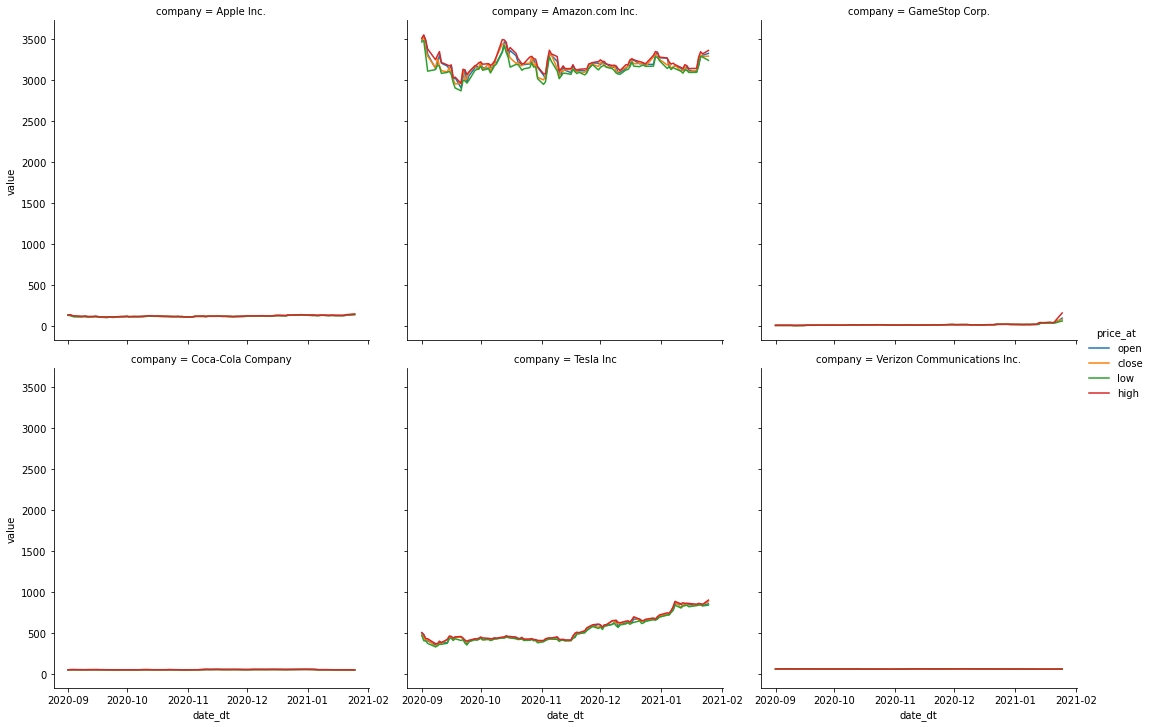

In [111]:
sns.relplot(data = tidy_stocks, x='date_dt', y='value', hue='price_at', 
            col='company', col_wrap=3, kind='line')

plt.show()

The above figure is not very satisfying, the y-axis scales are dominated by Amazon! Let's instead use the `sns.FacetGrid()` function to have further control over the facets and specify separate y-axis scales for each facet. We will then "map" a DataFrame to each facet and apply a line plot. As shown below, we now have a separate facet for each company with the y-axis scales representative of the stock prices for each separate company. Note that the above figure is easier to produce in ggplot2 in R (the Seaborn package is inspired by ggplot2).

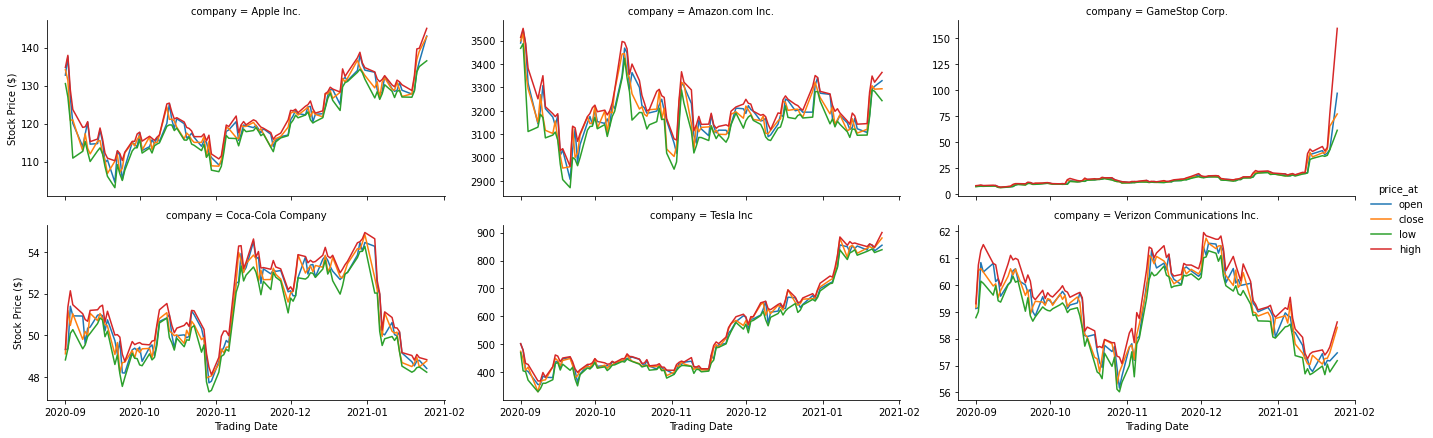

In [112]:
g = sns.FacetGrid(data = tidy_stocks, col='company', col_wrap=3, hue='price_at', sharey=False, aspect=2.1)

g.map_dataframe(sns.lineplot, x = 'date_dt', y='value')

g.set_axis_labels('Trading Date', 'Stock Price ($)')

g.add_legend()

plt.show()

We can also easily subset our tidy long-format data to focus on a single company to make it even easier to the behavior between the 4 types of prices. For example, let's focus on Amazon's stock. The open and closing prices are contained within the low and high prices, since those two are the minimum and maximum observed prices per day, respectively.

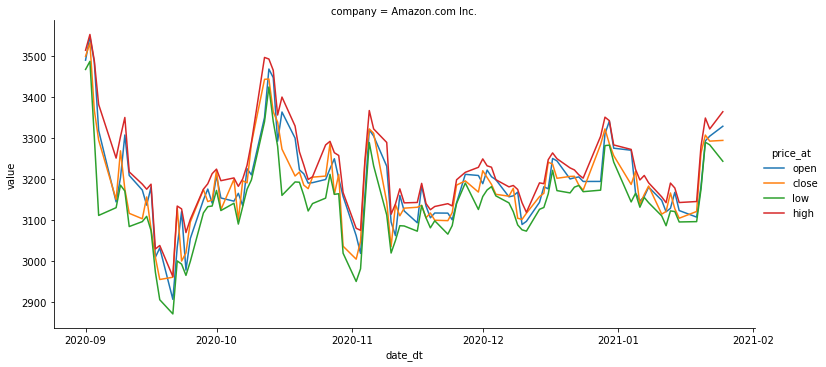

In [113]:
sns.relplot(data = tidy_stocks.loc[ tidy_stocks.symbol == 'AMZN', :], 
            x='date_dt', y='value', hue='price_at', 
            col='company', kind='line',
            aspect=2.1)

plt.show()

## Problem 04

Now that we have our tidy long-format data set for the stocks data, let's go ahead and investigate the data further by performing several grouping and aggregation operations.

**Question: How many unique days are associated with each MONTH of the data set?**

If you did not already convert the `date` column into a datetime object and extract the year, month, and day attributes you would have needed to do so to proceed to answer this question. Since we already did that in Problem 03, all we have to do now is to group by the `year` and `month` and count the unique number of days in that month. Note that we are counting the unique number of *trading days* and not just the number of days in the month. The number of trading days closely follow the standard work week, and so weekends are not included in the data set. The number of days per month are determined by applying the `nunique()` function to the `day` column in the `.aggregate()` method for each `year`, `month` group. Several other basic operations are included as reference, such as number of rows, number of non-missings, number of types of prices, and as a confirmation the number of unique week days. As we can see below, there are 5 unique day-in-week values per month corresponding to the 5 days in the work week.

In [114]:
tidy_stocks.groupby(['year', 'month']).\
aggregate(num_rows = ('value', 'size'),
          num_nonmissing_values = ('value', 'count'),
          num_price_types = ('price_at', 'nunique'),
          num_days = ('day', 'nunique'),
          num_weekdays = ('wday', 'nunique')).\
reset_index()

,year,month,num_rows,num_nonmissing_values,num_price_types,num_days,num_weekdays
0,2020,9,504,504,4,21,5
1,2020,10,528,528,4,22,5
2,2020,11,480,480,4,20,5
3,2020,12,528,528,4,22,5
4,2021,1,360,360,4,15,5


The number of trading days for each month are provided by the above display.

**Question: Calculate the difference between the daily close and daily open prices for each stock.**
* What is the maximum daily close-to-open difference for each company?
* What is the maximum daily close-to-open difference for each company in each month?
* What is the average daily close-to-open difference for each company in each month?

This question has three parts, but all three are associated with calculating the difference between the close and open prices. This difference corresponds to if the stock made or lost money on that day. 

Our tidy long-format data set is useful, but it cannot directly help us answer this question. **That's ok!** We just need to think about how to reorganize the "tidy" data set for our *analysis*. What we want to do is to calculate the difference between the price-at-close and the price-at-open. If we had separate columns for each type of price, on a given day per stock it would be easy to calculate the difference between the close and open columns. Let's take a look at the first few rows of our tidy data set again.

In [115]:
tidy_stocks.head()

,exchange,sector,company,symbol,date_dt,year,month,day,wday,price_at,value
0,NASDAQ,Information Technology,Apple Inc.,AAPL,2020-09-01,2020,9,1,1,open,132.759995
1,NASDAQ,Information Technology,Apple Inc.,AAPL,2020-09-02,2020,9,2,2,open,137.589996
2,NASDAQ,Information Technology,Apple Inc.,AAPL,2020-09-03,2020,9,3,3,open,126.910004
3,NASDAQ,Information Technology,Apple Inc.,AAPL,2020-09-04,2020,9,4,4,open,120.070000
4,NASDAQ,Information Technology,Apple Inc.,AAPL,2020-09-08,2020,9,8,1,open,113.949997


Essentially, we want to "swing" or *pivot* the values in the `price_at` column into separate columns. The values assigned to each cell (row and column position) will be the `value` of that `price_at` per day per stock. The pivoting result is shown below where the `index` is set to the combination of all columns describing the company and the trading day. Notice there are 4 new columns `close`, `high`, `low`, and `open`. The values in those columns were the entries in the `value` column in the tidy long-format data set. The number of rows and columns of the pivoting result are displayed at the bottom of the DataFrame. There are 600 rows because there are 100 trading days for each of the 6 companies.

In [116]:
tidy_stocks.pivot( index=['exchange', 'sector', 'company', 'symbol', 'date_dt', 'year', 'month', 'day', 'wday'],
                   columns = 'price_at',
                   values='value' ).\
reset_index()

price_at,exchange,sector,company,symbol,date_dt,year,month,day,wday,close,high,low,open
0,NASDAQ,Consumer Discretionary,Amazon.com Inc.,AMZN,2020-09-01,2020,9,1,1,3499.120117,3513.870117,3467.000000,3489.580078
1,NASDAQ,Consumer Discretionary,Amazon.com Inc.,AMZN,2020-09-02,2020,9,2,2,3531.449951,3552.250000,3486.689941,3547.000000
2,NASDAQ,Consumer Discretionary,Amazon.com Inc.,AMZN,2020-09-03,2020,9,3,3,3368.000000,3488.409912,3303.000000,3485.000000
3,NASDAQ,Consumer Discretionary,Amazon.com Inc.,AMZN,2020-09-04,2020,9,4,4,3294.620117,3381.500000,3111.129883,3318.000000
4,NASDAQ,Consumer Discretionary,Amazon.com Inc.,AMZN,2020-09-08,2020,9,8,1,3149.840088,3250.850098,3130.000000,3144.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,NYSE,Consumer Staples,Coca-Cola Company,KO,2021-01-19,2021,1,19,1,48.509998,49.040001,48.240002,48.740002
596,NYSE,Consumer Staples,Coca-Cola Company,KO,2021-01-20,2021,1,20,2,48.680000,48.820000,48.310001,48.540001
597,NYSE,Consumer Staples,Coca-Cola Company,KO,2021-01-21,2021,1,21,3,48.950001,49.090000,48.459999,48.779999
598,NYSE,Consumer Staples,Coca-Cola Company,KO,2021-01-22,2021,1,22,4,48.490002,48.939999,48.490002,48.810001


The above *pivoted* data set is still tall or long relative to the companies. It is "wider" than our completely tidy data set, but it allows us to more easily answer the analysis questions we are interested in. However, since we can always join a data set with the `stock_info` to get the company names, let's work with a data set that only stores the company stock symbol. This way our print outs will have fewer columns. The wider pivoted DataFrame without the company names is assigned to the `wider_stock_prices` object.

In [117]:
wider_stock_prices = tidy_stocks.drop(['exchange', 'sector', 'company'], axis=1, inplace=False).copy().\
pivot( index=['symbol', 'date_dt', 'year', 'month', 'day', 'wday'],
       columns = 'price_at',
       values='value' ).\
reset_index()

The "wider" data set is shown below.

In [118]:
wider_stock_prices

price_at,symbol,date_dt,year,month,day,wday,close,high,low,open
0,AAPL,2020-09-01,2020,9,1,1,134.179993,134.800003,130.529999,132.759995
1,AAPL,2020-09-02,2020,9,2,2,131.399994,137.979996,127.000000,137.589996
2,AAPL,2020-09-03,2020,9,3,3,120.879997,128.839996,120.500000,126.910004
3,AAPL,2020-09-04,2020,9,4,4,120.959999,123.699997,110.889999,120.070000
4,AAPL,2020-09-08,2020,9,8,1,112.820000,118.989998,112.680000,113.949997
...,...,...,...,...,...,...,...,...,...,...
595,VZ,2021-01-19,2021,1,19,1,57.049999,57.580002,56.980000,57.439999
596,VZ,2021-01-20,2021,1,20,2,57.259998,57.389999,56.660000,57.009998
597,VZ,2021-01-21,2021,1,21,3,57.270000,57.509998,57.049999,57.189999
598,VZ,2021-01-22,2021,1,22,4,57.470001,57.689999,56.759998,57.169998


Let's now define a new column that equals the difference in the `close` and `open` columns. We will call this column `daily_change`.

In [119]:
wider_stock_prices['daily_change'] = wider_stock_prices.close - wider_stock_prices.open

Let's now summarize the `daily_change` column to answer the questions of interest.

**What is the maximum daily close-to-open difference for each company?**

We can group `wider_stock_prices` by each company stock `symbol` and calculate the maximum value for the `daily_change` column.

In [120]:
wider_stock_prices.groupby(['symbol']).\
aggregate(max_daily_change = ('daily_change', 'max')).\
reset_index()

,symbol,max_daily_change
0,AAPL,5.540001
1,AMZN,95.149902
2,GME,22.420002
3,KO,1.829998
4,TSLA,52.700012
5,VZ,1.379997


**What is the maximum daily close-to-open difference for each compnay in each month?**

For this question we need to group by three columns, `year`, `month`, and `symbol`. The maximum value of `daily_change` is summarized within the `aggregate()` function just as we did before.

In [121]:
wider_stock_prices.groupby(['year', 'month', 'symbol']).\
aggregate(max_daily_change = ('daily_change', 'max')).\
reset_index()

,year,month,symbol,max_daily_change
0,2020,9,AAPL,5.540001
1,2020,9,AMZN,95.149902
2,2020,9,GME,1.650000
3,2020,9,KO,1.829998
4,2020,9,TSLA,38.669983
5,2020,9,VZ,1.379997
6,2020,10,AAPL,4.340004
7,2020,10,AMZN,92.989991
8,2020,10,GME,3.950000
9,2020,10,KO,0.750000


**What is the average daily close-to-open difference for each company in each month?**

We can perform the same steps as the previous question, except we will calculate the average difference rather than the maximum.

In [122]:
wider_stock_prices.groupby(['year', 'month', 'symbol']).\
aggregate(avg_daily_change = ('daily_change', 'mean')).\
reset_index()

,year,month,symbol,avg_daily_change
0,2020,9,AAPL,-0.953812
1,2020,9,AMZN,-19.792841
2,2020,9,GME,0.064286
3,2020,9,KO,-0.036191
4,2020,9,TSLA,-0.787619
5,2020,9,VZ,-0.005714
6,2020,10,AAPL,-0.280908
7,2020,10,AMZN,-10.758223
8,2020,10,GME,0.031364
9,2020,10,KO,-0.029545


Note that we could also calculate the maximum, average, and minimum change (as well as other statistics) in a single `.aggregate()` method call.

In [123]:
wider_stock_prices.groupby(['year', 'month', 'symbol']).\
aggregate(max_daily_change = ('daily_change', 'max'),
          avg_daily_change = ('daily_change', 'mean'),
          min_daily_change = ('daily_change', 'min')).\
reset_index()

,year,month,symbol,max_daily_change,avg_daily_change,min_daily_change
0,2020,9,AAPL,5.540001,-0.953812,-6.870003
1,2020,9,AMZN,95.149902,-19.792841,-132.109864
2,2020,9,GME,1.650000,0.064286,-0.610000
3,2020,9,KO,1.829998,-0.036191,-1.520001
4,2020,9,TSLA,38.669983,-0.787619,-31.619995
5,2020,9,VZ,1.379997,-0.005714,-0.920002
6,2020,10,AAPL,4.340004,-0.280908,-4.169999
7,2020,10,AMZN,92.989991,-10.758223,-121.600098
8,2020,10,GME,3.950000,0.031364,-1.480000
9,2020,10,KO,0.750000,-0.029545,-1.040001


**Question: Which day had the maximum daily high price for each company in each month?**

There are multiple ways to answer this question, and it is a little tricky requiring some planning to complete. Let's go ahead and focus just on the `high` price from the "wider" data set.

In [124]:
stocks_high = wider_stock_prices.loc[:, ['symbol', 'date_dt', 'year', 'month', 'day', 'high']].reset_index().copy()

Let's add in a column which is simply a copy of the index.

In [125]:
stocks_high['row_index'] = stocks_high.index

The "wide" data set with the high prices and the additional `row_index` column is displayed below.

In [126]:
stocks_high

price_at,index,symbol,date_dt,year,month,day,high,row_index
0,0,AAPL,2020-09-01,2020,9,1,134.800003,0
1,1,AAPL,2020-09-02,2020,9,2,137.979996,1
2,2,AAPL,2020-09-03,2020,9,3,128.839996,2
3,3,AAPL,2020-09-04,2020,9,4,123.699997,3
4,4,AAPL,2020-09-08,2020,9,8,118.989998,4
...,...,...,...,...,...,...,...,...
595,595,VZ,2021-01-19,2021,1,19,57.580002,595
596,596,VZ,2021-01-20,2021,1,20,57.389999,596
597,597,VZ,2021-01-21,2021,1,21,57.509998,597
598,598,VZ,2021-01-22,2021,1,22,57.689999,598


Let's now group by the `symbol`, `year`, and `month` columns. We will aggregate the `high` column by finding it's maximum value as well as the index within the group that corresponds to the maximum via the `np.argmax()` function. The minimum and maximum `row_index` values per group are also summarized.

In [127]:
month_stocks_high = stocks_high.groupby(['symbol', 'year', 'month']).\
aggregate(max_high_price = ('high', 'max'),
          id_at_max_high = ('high', np.argmax),
          index_min = ('row_index', 'min'),
          index_max = ('row_index', 'max')).\
reset_index()

We can now calculate the index associated with the maximum `high` price by adding the `id_at_max_high` to the `index_min` column. This works because th `np.argmax()` function found the index associated with the maximum `high` price, but that index is "local" within each group. By storing the minimum `row_index` for each group, we can then recover the "macro" index through addition.

In [128]:
month_stocks_high['row_index_at_max'] = month_stocks_high.id_at_max_high.astype('int64') + month_stocks_high.index_min

The summarized `high` price dataset per month and company is displayed below.

In [129]:
month_stocks_high

,symbol,year,month,max_high_price,id_at_max_high,index_min,index_max,row_index_at_max
0,AAPL,2020,9,137.979996,1.0,0,20,1
1,AAPL,2020,10,125.389999,8.0,21,42,29
2,AAPL,2020,11,121.989998,5.0,43,62,48
3,AAPL,2020,12,138.789993,19.0,63,84,82
4,AAPL,2021,1,145.089996,14.0,85,99,99
5,AMZN,2020,9,3552.250000,1.0,100,120,101
6,AMZN,2020,10,3496.239990,7.0,121,142,128
7,AMZN,2020,11,3366.800049,3.0,143,162,146
8,AMZN,2020,12,3350.649902,19.0,163,184,182
9,AMZN,2021,1,3363.889893,14.0,185,199,199


We can now subset the `stocks_high` data set to identify the rows with the maximum `high` price per stock `symbol` per month using the `.isin()` method.

In [130]:
stocks_high.loc[ stocks_high.row_index.isin( month_stocks_high.row_index_at_max.to_list()) ]

price_at,index,symbol,date_dt,year,month,day,high,row_index
1,1,AAPL,2020-09-02,2020,9,2,137.979996,1
29,29,AAPL,2020-10-13,2020,10,13,125.389999,29
48,48,AAPL,2020-11-09,2020,11,9,121.989998,48
82,82,AAPL,2020-12-29,2020,12,29,138.789993,82
99,99,AAPL,2021-01-25,2021,1,25,145.089996,99
101,101,AMZN,2020-09-02,2020,9,2,3552.250000,101
128,128,AMZN,2020-10-12,2020,10,12,3496.239990,128
146,146,AMZN,2020-11-05,2020,11,5,3366.800049,146
182,182,AMZN,2020-12-29,2020,12,29,3350.649902,182
199,199,AMZN,2021-01-25,2021,1,25,3363.889893,199


To confirm this approach worked as expected, let's focus on the Amazon's monthly maximum `high` price.

In [131]:
stocks_high.loc[ (stocks_high.symbol == 'AMZN') & stocks_high.row_index.isin( month_stocks_high.row_index_at_max.to_list()) ]

price_at,index,symbol,date_dt,year,month,day,high,row_index
101,101,AMZN,2020-09-02,2020,9,2,3552.250000,101
128,128,AMZN,2020-10-12,2020,10,12,3496.239990,128
146,146,AMZN,2020-11-05,2020,11,5,3366.800049,146
182,182,AMZN,2020-12-29,2020,12,29,3350.649902,182
199,199,AMZN,2021-01-25,2021,1,25,3363.889893,199


As we can see above the maximum `high` price in the month of September in 2020 occurs on September 2, 2020. Let's confirm this by subsetting the AMZN `high` stock prices in September and sorting the values in descending order. The cell below only displays the first few rows of the sorted data set because we are focused on the maximum value per month.

In [132]:
stocks_high.loc[ (stocks_high.symbol == 'AMZN') & (stocks_high.year == 2020) & (stocks_high.month == 9), : ].\
sort_values(['high'], ascending=False).\
head()

price_at,index,symbol,date_dt,year,month,day,high,row_index
101,101,AMZN,2020-09-02,2020,9,2,3552.250000,101
100,100,AMZN,2020-09-01,2020,9,1,3513.870117,100
102,102,AMZN,2020-09-03,2020,9,3,3488.409912,102
103,103,AMZN,2020-09-04,2020,9,4,3381.500000,103
106,106,AMZN,2020-09-10,2020,9,10,3349.889893,106


As shown above, the maximum `high` price in September does indeed occur on September 2, 2020.

Let's double check the behavior in November. Our grouping and aggregation approach identified November 5, 2020 as the day with the maximum `high` price.

In [133]:
stocks_high.loc[ (stocks_high.symbol == 'AMZN') & (stocks_high.year == 2020) & (stocks_high.month == 11), : ].\
sort_values(['high'], ascending=False).\
head()

price_at,index,symbol,date_dt,year,month,day,high,row_index
146,146,AMZN,2020-11-05,2020,11,5,3366.800049,146
147,147,AMZN,2020-11-06,2020,11,6,3322.000000,147
148,148,AMZN,2020-11-09,2020,11,9,3289.000000,148
145,145,AMZN,2020-11-04,2020,11,4,3244.850098,145
162,162,AMZN,2020-11-30,2020,11,30,3228.389893,162


Again, we see that the maximum `high` price coincided with what we found previously!